## Task :  Build an ANN model for Drug classification

In [1]:
# importing all the neccessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
drugs_df = pd.read_csv('drug200.csv')
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# displaying the first 5 records
drugs_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# displaying the last 5 records
drugs_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
# size of the dataset
drugs_df.shape

(200, 6)

In [6]:
# data types of the dataset
drugs_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
# unique values in a dataset
drugs_df["Drug"].sort_values(ascending=True).unique()
# five types of drugs

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [8]:
# replacing the DrugY by drugY
drugs_df["Drug"].replace({'DrugY':'drugY'},inplace=True)

In [9]:
# get the five point summary
drugs_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
# checking for missing values
drugs_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
# Checking for duplicates
drugs_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
# columns in the dataset
drugs_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [13]:
# value count
drugs_df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

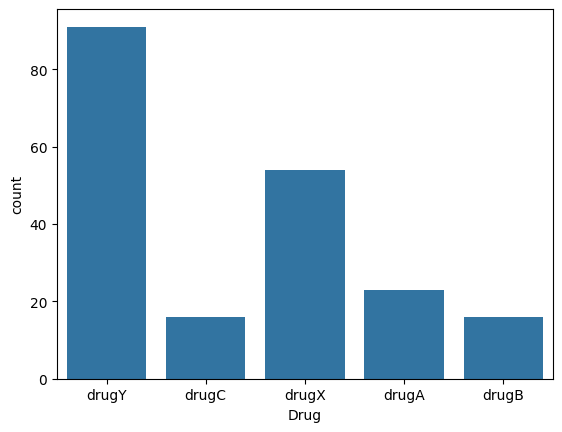

In [14]:
# frequency of the drugs
sns.countplot(x=drugs_df["Drug"])

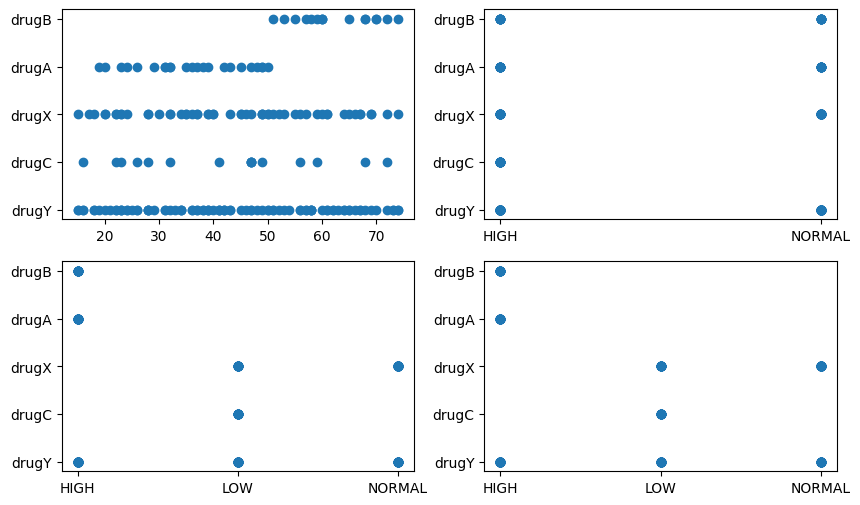

In [15]:
# matplotlib
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.scatter(y=drugs_df["Drug"],x=drugs_df["Age"])

plt.subplot(2,2,2)
plt.scatter(y=drugs_df["Drug"],x=drugs_df["Cholesterol"])

plt.subplot(2,2,3)
plt.scatter(y=drugs_df["Drug"],x=drugs_df["BP"])

plt.subplot(2,2,4)
plt.scatter(y=drugs_df["Drug"],x=drugs_df["BP"])

In [16]:
drug=drugs_df["Drug"]=="drugY"
drugs_df.loc[drug]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
4,61,F,LOW,HIGH,18.043,drugY
6,49,F,NORMAL,HIGH,16.275,drugY
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
...,...,...,...,...,...,...
188,65,M,HIGH,NORMAL,34.997,drugY
189,64,M,HIGH,NORMAL,20.932,drugY
190,58,M,HIGH,HIGH,18.991,drugY
192,72,M,LOW,HIGH,16.310,drugY


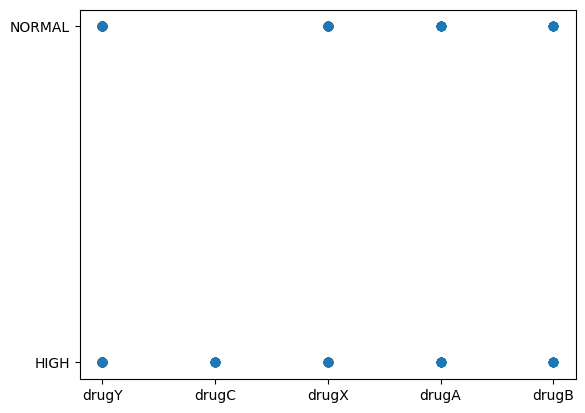

In [17]:
plt.scatter(x=drugs_df["Drug"],y=drugs_df["Cholesterol"])

<Axes: ylabel='Na_to_K'>

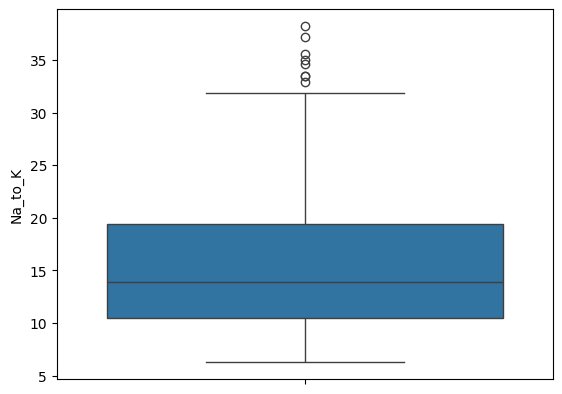

In [18]:
sns.boxplot(drugs_df["Na_to_K"])

In [19]:
# print the categories present in the columns
print(drugs_df["Sex"].value_counts())
print(drugs_df["BP"].value_counts())
print(drugs_df["Cholesterol"].value_counts())

M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


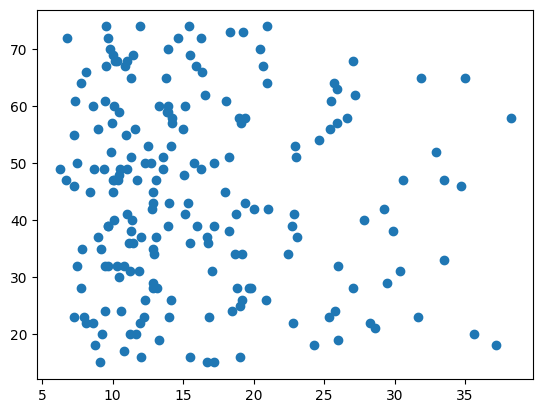

In [20]:
plt.scatter(y=drugs_df["Age"],x=drugs_df["Na_to_K"])

In [21]:
drugs_df["Na_to_K"].sort_values(ascending=True).values


array([ 6.269,  6.683,  6.769,  7.261,  7.285,  7.298,  7.34 ,  7.477,
        7.49 ,  7.761,  7.798,  7.845,  8.011,  8.107,  8.151,  8.37 ,
        8.607,  8.621,  8.7  ,  8.75 ,  8.966,  8.968,  9.084,  9.17 ,
        9.281,  9.381,  9.443,  9.445,  9.475,  9.514,  9.567,  9.664,
        9.677,  9.709,  9.712,  9.849,  9.894,  9.945, 10.017, 10.065,
       10.067, 10.091, 10.103, 10.114, 10.189, 10.291, 10.292, 10.403,
       10.443, 10.444, 10.446, 10.537, 10.605, 10.832, 10.84 , 10.898,
       10.977, 11.009, 11.014, 11.037, 11.198, 11.227, 11.262, 11.326,
       11.34 , 11.343, 11.349, 11.424, 11.455, 11.567, 11.686, 11.767,
       11.871, 11.939, 11.953, 12.006, 12.006, 12.26 , 12.295, 12.307,
       12.495, 12.703, 12.766, 12.854, 12.856, 12.859, 12.879, 12.894,
       12.923, 13.091, 13.093, 13.127, 13.303, 13.313, 13.597, 13.598,
       13.769, 13.884, 13.934, 13.935, 13.938, 13.967, 13.972, 14.02 ,
       14.133, 14.16 , 14.216, 14.239, 14.642, 15.015, 15.036, 15.156,
      

In [22]:
outliers=drugs_df["Na_to_K"]>=31
drugs_df.loc[outliers]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
24,33,F,LOW,HIGH,33.486,drugY
33,65,F,HIGH,NORMAL,31.876,drugY
48,23,M,NORMAL,HIGH,31.686,drugY
96,58,F,LOW,HIGH,38.247,drugY
98,20,M,HIGH,NORMAL,35.639,drugY
128,47,M,LOW,NORMAL,33.542,drugY
131,52,M,LOW,NORMAL,32.922,drugY
184,18,F,HIGH,HIGH,37.188,drugY
188,65,M,HIGH,NORMAL,34.997,drugY
194,46,F,HIGH,HIGH,34.686,drugY


In [23]:
drugs_df.drop([131,96, 98, 184,188,194,24,128,65,23], inplace=True)


<Axes: ylabel='Na_to_K'>

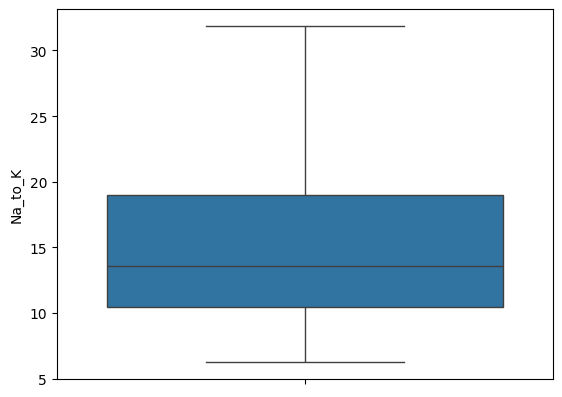

In [24]:
sns.boxplot(drugs_df["Na_to_K"])

In [25]:
data= drugs_df["Na_to_K"]>=30 & (drugs_df["Age"]==20)
drugs_df.loc[data]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [26]:
print(drugs_df["Na_to_K"].min())
print(drugs_df["Na_to_K"].mean())
print(drugs_df["Na_to_K"].max())
print(drugs_df["Age"].min())
print(drugs_df["Age"].max())

6.269
15.232126315789476
31.876
15
74


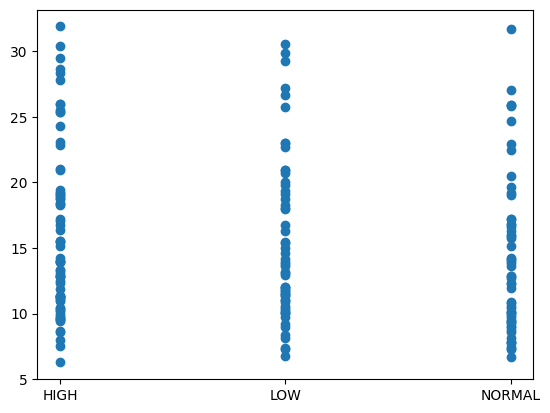

In [27]:
print(plt.scatter(x=drugs_df["BP"],y=drugs_df["Na_to_K"]))


In [28]:
drugs_df["Sex"].value_counts()

M    100
F     90
Name: Sex, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

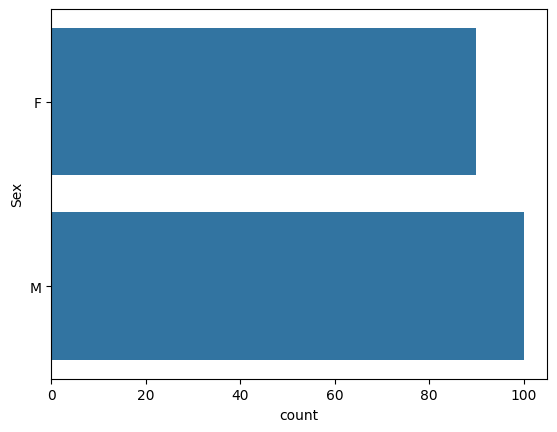

In [29]:
sns.countplot(drugs_df["Sex"])

In [30]:
# encoding the categorical vairables sex and drugs as one hot encoding and others as label encoder
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder


In [31]:
drugs_df = pd.get_dummies(drugs_df, columns=["Sex","Drug"])

In [32]:
drugs_df

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,HIGH,HIGH,25.355,1,0,0,0,0,0,1
1,47,LOW,HIGH,13.093,0,1,0,0,1,0,0
2,47,LOW,HIGH,10.114,0,1,0,0,1,0,0
3,28,NORMAL,HIGH,7.798,1,0,0,0,0,1,0
4,61,LOW,HIGH,18.043,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,1,0,0,0,1,0,0
196,16,LOW,HIGH,12.006,0,1,0,0,1,0,0
197,52,NORMAL,HIGH,9.894,0,1,0,0,0,1,0
198,23,NORMAL,NORMAL,14.020,0,1,0,0,0,1,0


In [33]:
drugs_df["BP"]=drugs_df["BP"].replace({'LOW':1,'NORMAL':2,'HIGH':3})
drugs_df["Cholesterol"].replace({'LOW':1,'NORMAL':2,'HIGH':3},inplace=True)


In [34]:
drugs_df

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,3,3,25.355,1,0,0,0,0,0,1
1,47,1,3,13.093,0,1,0,0,1,0,0
2,47,1,3,10.114,0,1,0,0,1,0,0
3,28,2,3,7.798,1,0,0,0,0,1,0
4,61,1,3,18.043,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,56,1,3,11.567,1,0,0,0,1,0,0
196,16,1,3,12.006,0,1,0,0,1,0,0
197,52,2,3,9.894,0,1,0,0,0,1,0
198,23,2,2,14.020,0,1,0,0,0,1,0


In [35]:
# Splitting the data into dependent and independent variavble
X = drugs_df.iloc[:,:-5]
X

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,3,3,25.355,1,0
1,47,1,3,13.093,0,1
2,47,1,3,10.114,0,1
3,28,2,3,7.798,1,0
4,61,1,3,18.043,1,0
...,...,...,...,...,...,...
195,56,1,3,11.567,1,0
196,16,1,3,12.006,0,1
197,52,2,3,9.894,0,1
198,23,2,2,14.020,0,1


In [36]:
y = drugs_df.iloc[:,6:]
y

,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
195,0,0,1,0,0
196,0,0,1,0,0
197,0,0,0,1,0
198,0,0,0,1,0


In [37]:
X.shape,y.shape

((190, 6), (190, 5))

In [38]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [40]:
X_train

array([[ 1.40252290e+00, -6.37576713e-02, -1.05409255e+00,
        -9.11791241e-01, -9.61275524e-01,  9.61275524e-01],
       [ 9.65031150e-01, -6.37576713e-02,  9.48683298e-01,
         1.67637195e-03, -9.61275524e-01,  9.61275524e-01],
       [ 1.52546466e-01, -6.37576713e-02, -1.05409255e+00,
        -1.36892874e+00,  1.04028447e+00, -1.04028447e+00],
       [-9.72432326e-01,  1.14763808e+00,  9.48683298e-01,
         2.30738683e+00,  1.04028447e+00, -1.04028447e+00],
       [-1.59947643e-01, -1.27515343e+00, -1.05409255e+00,
         2.27848269e+00,  1.04028447e+00, -1.04028447e+00],
       [-3.47444108e-01, -6.37576713e-02,  9.48683298e-01,
         1.30533921e-01, -9.61275524e-01,  9.61275524e-01],
       [-1.40992408e+00,  1.14763808e+00, -1.05409255e+00,
         1.23648048e+00,  1.04028447e+00, -1.04028447e+00],
       [-1.53492172e+00, -6.37576713e-02, -1.05409255e+00,
        -9.49415062e-01,  1.04028447e+00, -1.04028447e+00],
       [-8.47434683e-01,  1.14763808e+00,  9.486

In [41]:
X_test

array([[ 1.19665707, -1.3723223 , -0.9486833 , -0.29041559,  1.11143786,
        -1.11143786],
       [-0.92723009,  0.99805258, -0.9486833 ,  0.60482713,  1.11143786,
        -1.11143786],
       [ 0.43423604, -1.3723223 , -0.9486833 ,  1.24272077,  1.11143786,
        -1.11143786],
       [-0.65493686,  0.99805258, -0.9486833 , -0.60554368, -0.89973541,
         0.89973541],
       [-0.60047822, -0.18713486,  1.05409255, -1.3350868 ,  1.11143786,
        -1.11143786],
       [-0.65493686,  0.99805258, -0.9486833 ,  0.25748889, -0.89973541,
         0.89973541],
       [-1.09060602, -1.3723223 ,  1.05409255, -1.36480647, -0.89973541,
         0.89973541],
       [ 1.46895029, -0.18713486,  1.05409255,  0.82531717,  1.11143786,
        -1.11143786],
       [ 0.32531875,  0.99805258, -0.9486833 , -1.13203008, -0.89973541,
         0.89973541],
       [-0.11035041, -1.3723223 ,  1.05409255, -0.74401409, -0.89973541,
         0.89973541],
       [-1.14506467, -0.18713486,  1.05409255, -1.

In [42]:
# Buidling the ANN model
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy


In [43]:
model = Sequential()

In [44]:
X.shape

(190, 6)

In [45]:
model.add(Dense(units=6,activation='relu',kernel_initializer='random_uniform')) # input layer
model.add(Dense(units=20,activation='relu',kernel_initializer='random_uniform')) # hidden layer 1
model.add(Dense(units=20,activation='relu',kernel_initializer='random_uniform')) # hidden layer 2
model.add(Dense(units=20,activation='relu',kernel_initializer='random_uniform')) # hidden layer 3
model.add(Dense(units=5,activation='softmax',kernel_initializer='random_uniform')) # Output layer
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])

In [46]:
X_train.shape,y_train.shape

((152, 6), (152, 5))

In [47]:
model.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2624 - loss: 1.6088
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4033 - loss: 1.6055 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4137 - loss: 1.6012 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3838 - loss: 1.5969 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3682 - loss: 1.5918 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3738 - loss: 1.5869 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4116 - loss: 1.5803 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4003 - loss: 1.5754 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4168 - loss: 1.5616 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4107 - loss: 1.5471 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4111 - loss: 1.5314 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4376 - loss

In [48]:
ypred=model.predict(X_test)
ypred=np.argmax(ypred, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [49]:
y_test=np.array(y_test)
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [51]:
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [50]:
ypred

array([3, 4, 4, 0, 3, 4, 3, 4, 0, 3, 3, 3, 4, 4, 3, 0, 3, 4, 3, 0, 3, 3,
       4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 0, 3, 4, 3, 3], dtype=int64)

In [68]:
df ={
    'y_pred' :ypred,
    'y_test' :indices_of_ones
}
pd.DataFrame(df)

,y_pred,y_test
0,3,3
1,4,4
2,4,4
3,0,0
4,3,3
5,4,4
6,3,2
7,4,4
8,0,0
9,3,2


In [62]:
indices_of_ones = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if y_test[i][j] == 1:
            indices_of_ones.append(( j))

print(indices_of_ones)

[3, 4, 4, 0, 3, 4, 2, 4, 0, 2, 3, 3, 4, 4, 2, 0, 3, 4, 4, 1, 3, 3, 4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 0, 2, 4, 4, 3]


In [53]:
drugs_df.head(1)

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,3,3,25.355,1,0,0,0,0,0,1


In [54]:
X.shape

(190, 6)

In [55]:
X.iloc[0]

Age            23.000
BP              3.000
Cholesterol     3.000
Na_to_K        25.355
Sex_F           1.000
Sex_M           0.000
Name: 0, dtype: float64

In [56]:
ypred[0].argmax()

0

In [57]:
# y_test.iloc[0:1]

In [58]:
ypred.shape

(38,)

In [59]:
X_train.shape,y_train.shape

((152, 6), (152, 5))

In [60]:
X_test.shape,y_test.shape

((38, 6), (38, 5))

In [69]:
from sklearn.metrics import accuracy_score
cm= accuracy_score(indices_of_ones,ypred)
cm

0.8157894736842105